In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis
from statsmodels.graphics.gofplots import qqplot
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn import tree


pd.set_option('display.max_columns', None)

In [3]:
# Datasets

houses_train = pd.read_csv("C:/Users/teste/Downloads/house-prices-advanced-regression-techniques/train.csv")

houses_test = pd.read_csv("C:/Users/teste/Downloads/house-prices-advanced-regression-techniques/test.csv")

In [4]:
missing_values = houses_train.isna().sum()
missing_values.sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [5]:
houses_train_final = houses_train.copy()

In [6]:
cols_with_missingness = ['PoolQC', 
                        'MiscFeature',
                        'Alley']

In [7]:
houses_train_final = houses_train_final.drop(cols_with_missingness, axis =1)

In [8]:
cat_cols = houses_train_final.select_dtypes(include=['object', 'category']).columns.tolist()

In [9]:
houses_train_final = pd.get_dummies(houses_train_final, columns=cat_cols, drop_first=True)

In [10]:
cols_with_multicolin = ['TotalBsmtSF','TotRmsAbvGrd', 'GarageCars', 'MSZoning_RL', 
                        'Condition1_Feedr', 'Condition2_Feedr', 'RoofStyle_Gambrel', 
                        'Exterior2nd_CBlock', 'GarageQual_TA']

In [11]:
houses_train_final = houses_train_final.drop(cols_with_multicolin, axis =1)

In [12]:
houses_train_final.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,854,0,1710,1,0,2,1,3,1,0,2003.0,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1

In [13]:
houses_train_final = houses_train_final.drop('Id', axis =1)

In [14]:
houses_train_final.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,854,0,1710,1,0,2,1,3,1,0,2003.0,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,

In [15]:
houses_train_final.fillna(0, inplace=True)

In [16]:
houses_train_final = houses_train_final[houses_train_final['GrLivArea'] < 4480]

In [17]:
houses_train_final['SalePrice'] = np.log(houses_train['SalePrice'])

houses_target = houses_train_final['SalePrice']
houses_target

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1458, dtype: float64

In [18]:
houses_train_final = houses_train_final.drop('SalePrice', axis =1)

## Train Test Split

In [19]:
X = houses_train_final
y = houses_target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Lasso

In [146]:
lasso_cv = LassoCV(alphas = [.0004, .0005, .0007, .0008, .0009, .001, .0015, .002, .001, .01, 1, 2], cv=10, max_iter=100000)

In [147]:
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=[0.0004, 0.0005, 0.0007, 0.0008, 0.0009, 0.001, 0.0015, 0.002,
                0.001, 0.01, 1, 2],
        cv=10, max_iter=100000)

In [148]:
lasso_cv.alpha_

0.0005

In [149]:
lasso_cv.coef_

array([-3.60562158e-04,  1.56357935e-04,  1.73146844e-06,  5.00442874e-02,
        4.13560335e-02,  2.14813388e-03,  1.07090364e-03,  3.05747074e-05,
        1.47408931e-04,  1.18121376e-04,  8.29551625e-05,  2.58516537e-04,
        2.42030330e-04,  2.68954406e-04,  3.54386344e-05,  3.28175005e-02,
       -0.00000000e+00,  1.32471458e-02,  1.37264380e-02,  0.00000000e+00,
       -1.14173706e-02,  2.24849502e-02,  3.79096478e-05,  1.26784836e-04,
        1.03484867e-04,  1.44150371e-04,  8.65699202e-05,  1.50619657e-04,
        1.90269752e-04,  5.30467830e-05, -4.82598588e-06, -7.76627664e-04,
       -4.81475661e-03,  2.90173082e-02, -0.00000000e+00, -5.06831265e-02,
        6.63943285e-02,  7.49973280e-03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        3.99634027e-02, -0.00000000e+00, -0.00000000e+00, -4.43627321e-03,
       -0.00000000e+00, -1.10814866e-02, -0.00000000e+00, -0.00000000e+00,
        5.26313360e-02,  

In [21]:
model_lasso = Lasso(alpha=0.0005)

In [22]:
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.0005)

In [23]:
lasso_prediction = model_lasso.predict(X_test)

In [24]:
mean_squared_error(y_test, lasso_prediction)

0.015688226280792264

In [25]:
rmse_laso = np.sqrt(mean_squared_error(y_test, lasso_prediction))

In [26]:
r2_lasso = r2_score(y_test, lasso_prediction)

In [133]:
r2_lasso

0.9069382463996333

In [27]:
len(model_lasso.coef_)

230

In [28]:
sum(abs(model_lasso.coef_)>0) 

96

## Ridge

In [122]:
ridge_cv = RidgeCV(alphas = [.1, 2, 4, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30], cv=10)

In [123]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=[0.1, 2, 4, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30],
        cv=10)

In [124]:
ridge_cv.alpha_

14.0

In [48]:
ridge_cv.coef_

array([-3.98753714e-04,  9.75499137e-05,  2.19678914e-06,  5.30988705e-02,
        4.31519584e-02,  1.90210556e-03,  9.17202339e-04,  1.19992643e-05,
        1.58811375e-04,  1.50479179e-04,  9.53203531e-05,  9.59689650e-05,
        8.03689628e-05,  3.90303674e-06,  1.80240960e-04,  2.19759779e-02,
       -4.02174672e-03,  1.80435284e-02,  2.31939314e-02,  4.02378430e-03,
       -2.45990111e-02,  1.45752174e-02,  2.53986275e-05,  1.23498917e-04,
        9.27922704e-05,  8.67714145e-05,  1.14953992e-04,  1.33405182e-04,
        2.44457285e-04,  1.10367864e-04, -4.14780001e-06, -7.19546302e-04,
       -3.79229614e-03,  1.97105251e-02,  3.88432755e-03, -3.36957401e-02,
        3.76726116e-02,  1.34428087e-02, -1.68252308e-03, -2.14983658e-03,
        8.90037532e-03, -1.78453168e-02,  9.42981511e-04, -6.74559736e-03,
        2.57543679e-02, -1.64248585e-02, -1.05656131e-02, -1.13949868e-02,
        6.69586449e-03, -3.16285374e-02, -4.00919064e-03, -2.10171474e-02,
        2.69929365e-02,  

In [29]:
model_ridge = Ridge(alpha=14)

In [30]:
model_ridge.fit(X_train, y_train)

Ridge(alpha=14)

In [31]:
ridge_prediction = model_ridge.predict(X_test)

In [32]:
mean_squared_error(y_test, ridge_prediction)

0.015555147595044738

In [33]:
rmse_ridge = np.sqrt(mean_squared_error(y_test, ridge_prediction))

In [134]:
r2_ridge = r2_score(y_test, ridge_prediction)
r2_ridge

0.9077276623374733

In [35]:
len(model_ridge.coef_)

230

In [36]:
sum(abs(model_ridge.coef_)>0) 

227

## Elastic Net

In [103]:
en_cv = ElasticNetCV(alphas = [.001, .01, .1, 1, 10, 15, 30],
                    l1_ratio= [0.1, 0.3, 0.5, 0.7, 0.9, 1.0], 
                    cv=10,
                    max_iter=100000)

In [104]:
en_cv.fit(X_train, y_train)

ElasticNetCV(alphas=[0.001, 0.01, 0.1, 1, 10, 15, 30], cv=10,
             l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 1.0], max_iter=100000)

In [105]:
en_cv.alpha_

0.001

In [106]:
en_cv.l1_ratio_

0.5

In [37]:
model_en = ElasticNet(alpha=.001, l1_ratio=0.5)

In [38]:
model_en.fit(X_train, y_train)

ElasticNet(alpha=0.001)

In [39]:
en_prediction = model_en.predict(X_test)

In [40]:
mean_squared_error(y_test, en_prediction)

0.015660612262406337

In [41]:
rmse_en = np.sqrt(mean_squared_error(y_test, en_prediction))

In [42]:
r2_en = r2_score(y_test, en_prediction)

In [132]:
r2_en

0.9071020513402908

In [131]:
model_en.coef_

array([-3.62264286e-04,  1.54188431e-04,  1.72068166e-06,  5.03391296e-02,
        4.14886833e-02,  2.14779648e-03,  1.07532144e-03,  3.11428836e-05,
        1.48226809e-04,  1.18909882e-04,  8.34302921e-05,  2.58330429e-04,
        2.42209905e-04,  2.68679014e-04,  3.54615651e-05,  3.25822384e-02,
       -0.00000000e+00,  1.31076875e-02,  1.37722400e-02,  0.00000000e+00,
       -1.09547264e-02,  2.24849073e-02,  3.82556383e-05,  1.26385428e-04,
        1.02754656e-04,  1.43899815e-04,  8.77924440e-05,  1.51586301e-04,
        1.90186988e-04,  5.18832932e-05, -4.90059809e-06, -7.64275994e-04,
       -4.85700286e-03,  2.81151812e-02, -0.00000000e+00, -5.09758835e-02,
        5.82376909e-02,  7.27567588e-03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        3.94907528e-02, -0.00000000e+00, -0.00000000e+00, -4.46669580e-03,
       -0.00000000e+00, -1.02655890e-02, -0.00000000e+00, -0.00000000e+00,
        5.16481728e-02,  

In [130]:
sum(abs(model_en.coef_)>0) 

96

## Random Forest

In [46]:
param_grid = {
    'n_estimators': [50, 75, 100, 200, 300],
    'max_depth': [None, 10, 15, 20, 25],
    'min_samples_split': [2, 3, 4, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [47]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error')

In [48]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 15, 20, 25],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 4, 5, 10],
                         'n_estimators': [50, 75, 100, 200, 300]},
             scoring='neg_mean_squared_error')

In [49]:
grid_search.best_params_

{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [50]:
grid_search.best_score_

-0.02029437826813748

In [51]:
rmse_rf = np.sqrt(-grid_search.best_score_)

In [43]:
model_forest = RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=200)

In [44]:
model_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=200)

## Trying Label Encoding One More Time

In [260]:
label_encode = LabelEncoder()

In [ ]:
#encode training set again and CV RF model one more time to see RMSE

In [70]:
houses_train_label = houses_train.copy()

In [71]:
houses_train_label

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [73]:
houses_train_label = houses_train_label.drop('Id', axis = 1)

In [75]:
houses_train_label['SalePrice'] = np.log(houses_train_label['SalePrice'])

In [76]:
houses_train_label

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,0,0,0,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,0,0,0,8,2007,WD,Normal,12.072541
1456,20,RL,85.0,13175,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,MnPrv,0,0,2,2010,WD,Normal,12.254863
1457,70,RL,66.0,9042,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,12.493130
1458,20,RL,68.0,9717,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,0,Attchd,1950.0,Unf,1,240

In [74]:
houses_train_label.fillna(0, inplace=True)

In [77]:
houses_train_label = houses_train_label.drop(cols_with_missingness, axis =1)

In [78]:
label_encoders = {}

for col in houses_train_label.columns:
    if houses_train_label[col].dtype == 'object':
        houses_train_label[col] = houses_train_label[col].astype(str)
        label_encoder = LabelEncoder()
        houses_train_label[col] = label_encoder.fit_transform(houses_train_label[col])
        label_encoders[col] = label_encoder

In [79]:
houses_train_label

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,2,196.0,2,4,2,3,4,4,3,706,6,0,150,856,1,0,1,5,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,0,2,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,0,0,2,2008,8,4,12.247694
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,3,0.0,3,4,1,3,4,2,1,978,6,0,284,1262,1,0,1,5,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,2,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,0,0,5,2007,8,4,12.109011
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,2,162.0,2,4,2,3,4,3,3,486,6,0,434,920,1,0,1,5,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,2,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,0,0,9,2008,8,4,12.317167
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,3,0.0,3,4,0,4,2,4,1,216,6,0,540,756,1,2,1,5,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,3,6,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,0,0,2,2006,8,0,11.849398
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,2,350.0,2,4,2,3,4,1,3,655,6,0,490,1145,1,0,1,5,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,2,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,0,0,12,2008,8,4,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,3,3,0,4,0,8,2,2,0,5,6,5,1999,2000,1,1,12,13,3,0.0,3,4,2,3,4,4,6,0,6,0,953,953,1,0,1,5,953,694,0,1647,0,0,2,1,3,1,3,7,6,1,5,2,1999.0,2,2,460,5,5,2,0,40,0,0,0,0,0,0,8,2007,8,4,12.072541
1456,20,3,85.0,13175,1,3,3,0,4,0,14,2,2,0,2,6,6,1978,1988,1,1,9,10,4,119.0,3,4,1,3,4,4,1,790,5,163,589,1542,1,4,1,5,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,5,2,1978.0,3,2,500,5,5,2,349,0,0,0,0,0,3,0,2,2010,8,4,12.254863
1457,70,3,66.0,9042,1,3,3,0,4,0,6,2,2,0,5,7,9,1941,2006,1,1,5,5,3,0.0,0,2,4,4,2,4,3,275,6,0,877,1152,1,0,1,5,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,3,2,1941.0,2,1,252,5,5,2,0,60,0,0,0,0,1,2500,5,2010,8,4,12.493130
1458,20,3,68.0,9717,1,3,3,0,4,0,12,2,2,0,2,5,6,1950,1996,3,1,8,8,3,0.0,3,4,1,4,4,3,3,49,5,1029,0,1078,1,2,1,1,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,0,2,1950.0,3,1,240,5,5,2,366,0,112,0,0,0,0,0,4,2010,8,4,11.864462


In [81]:
X1 = houses_train_label.drop('SalePrice', axis = 1)
y1 = houses_train_label['SalePrice']


X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [82]:
grid_search_label = GridSearchCV(estimator=RandomForestRegressor(), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error')

In [84]:
grid_search_label.fit(X1_train, y1_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 15, 20, 25],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 4, 5, 10],
                         'n_estimators': [50, 75, 100, 200, 300]},
             scoring='neg_mean_squared_error')

In [85]:
grid_search_label.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 300}

In [86]:
grid_search_label.best_score_

-0.02071234956494809

In [87]:
rmse_rf_lb = np.sqrt(-grid_search.best_score_)

In [88]:
rmse_rf_lb

0.1440018971079616

In [89]:
model_forest_label = RandomForestRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=300)

In [90]:
model_forest_label.fit(X1_train, y1_train)

RandomForestRegressor(max_depth=20, min_samples_split=3, n_estimators=300)

## RMSE Graphs

In [123]:
rmse_values = {'Ridge': rmse_ridge, 'Elastic Net': rmse_en, 'Lasso': rmse_laso, 'RF': rmse_rf, 
               'RF Label': rmse_rf_lb}

In [124]:
rmse_df = pd.DataFrame(rmse_values, index=['RMSE'])

In [125]:
model_names = rmse_df.columns

In [126]:
rmse_vals = rmse_df.iloc[0]

In [127]:
rmse_vals

Ridge          0.124720
Elastic Net    0.125142
Lasso          0.125253
RF             0.142458
RF Label       0.144002
Name: RMSE, dtype: float64

In [128]:
rmse_vals = rmse_vals.sort_values(ascending=True)

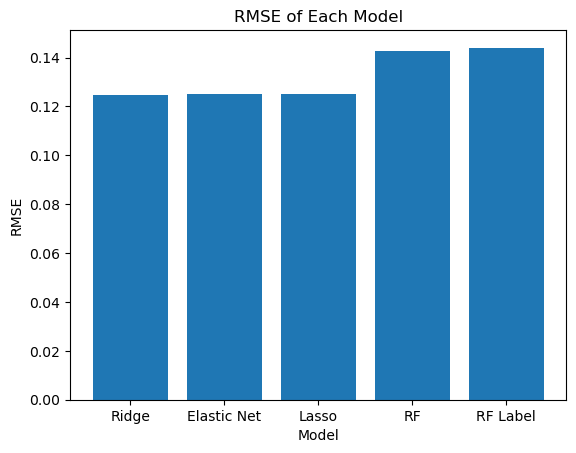

In [129]:
plt.bar(model_names, rmse_vals)
plt.title('RMSE of Each Model')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()

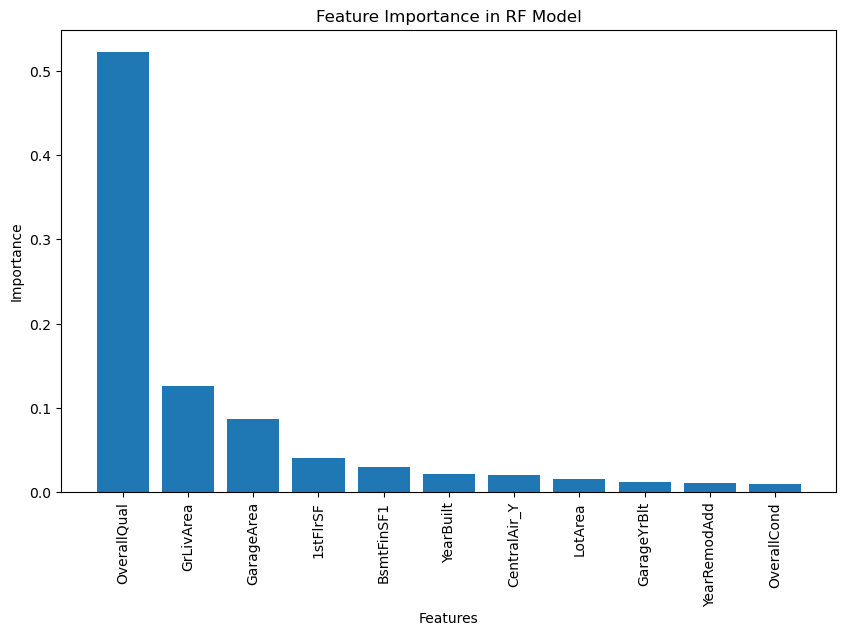

In [255]:
# One Hot Encoded RF #

importances = model_forest.feature_importances_
feature_names = houses_train_final.columns

threshold = 0.006
selected_indices = np.where(importances > threshold)
selected_importances = importances[selected_indices]
selected_feature_names = feature_names[selected_indices]
indices = np.argsort(selected_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance in RF Model")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.bar(range(len(selected_importances)), selected_importances[indices], align="center")
plt.xticks(range(len(selected_importances)), selected_feature_names[indices], rotation=90)
plt.show()

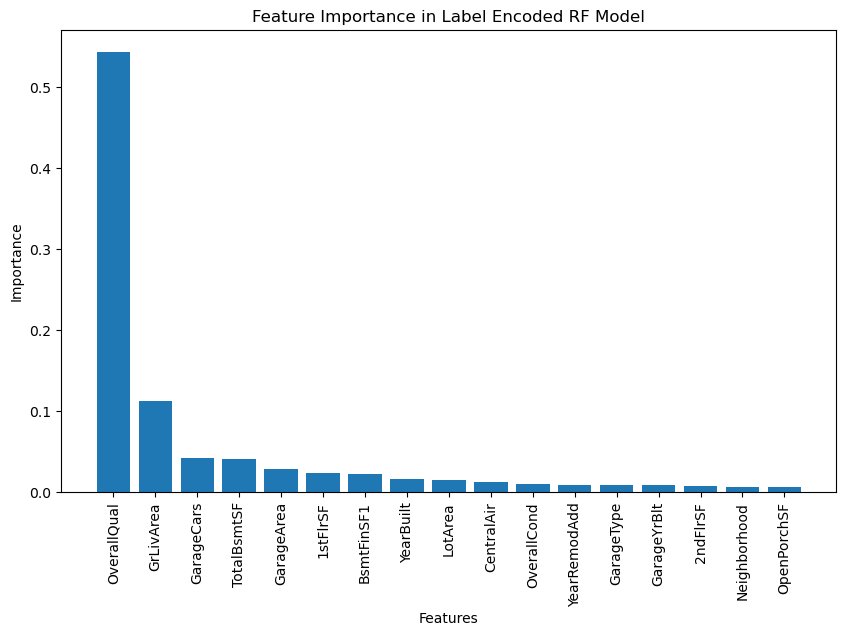

In [93]:
# Label Encoded RF #

importances = model_forest_label.feature_importances_
feature_names = houses_train_label.columns

threshold = 0.006
selected_indices = np.where(importances > threshold)
selected_importances = importances[selected_indices]
selected_feature_names = feature_names[selected_indices]
indices = np.argsort(selected_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Label Encoded RF Model")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.bar(range(len(selected_importances)), selected_importances[indices], align="center")
plt.xticks(range(len(selected_importances)), selected_feature_names[indices], rotation=90)
plt.show()

## 'Unlogging' Error Term

In [177]:
ln_test = 11.5

In [291]:
original_number = np.exp(ln_test)
original_number

98715.7710107605

In [292]:
np.log(98715.7710107605)

11.5

## All Model Errors in USD
- Estimated model predictions are off by these values in USD on average when compared to the actual prices
- Can just graph this now and maybe make it a percentage? What would it be a percentage of though? Average home price? 

In [95]:
rf_lb_usd = np.exp(rmse_rf_lb)

In [52]:
en_usd = np.exp(rmse_en)

In [56]:
lasso_usd = np.exp(rmse_laso)

In [57]:
ridge_usd = np.exp(rmse_ridge)

In [58]:
rf_usd = np.exp(rmse_rf)

In [114]:
usd_values = {'Ridge': ridge_usd, 'Elastic Net': en_usd, 'Lasso': lasso_usd, 'RF': rf_usd, 
              'RF Label': rf_lb_usd}

In [115]:
usd_df = pd.DataFrame(usd_values, index=['USD($)'])

In [116]:
usd_df

,Ridge,Elastic Net,Lasso,RF,RF Label
USD($),1.132832,1.13331,1.133435,1.153105,1.154886


In [117]:
model_names_usd = usd_df.columns

In [118]:
usd_vals = usd_df.iloc[0]

In [119]:
usd_vals

Ridge          1.132832
Elastic Net    1.133310
Lasso          1.133435
RF             1.153105
RF Label       1.154886
Name: USD($), dtype: float64

In [120]:
usd_vals = usd_vals.sort_values(ascending=True)

In [121]:
usd_vals

Ridge          1.132832
Elastic Net    1.133310
Lasso          1.133435
RF             1.153105
RF Label       1.154886
Name: USD($), dtype: float64

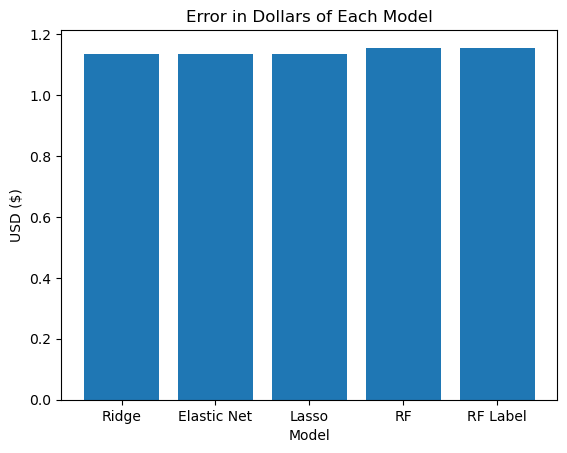

In [122]:
plt.bar(model_names_usd, usd_vals)
plt.title('Error in Dollars of Each Model')
plt.xlabel('Model')
plt.ylabel('USD ($)')
plt.show()